In [3]:
# standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# TiRex specific imports
from tirex import load_model
from tirex.util import plot_forecast

In [5]:
model = load_model("NX-AI/TiRex")

In [8]:
# generate a simple sine wave
sin = np.sin(np.arange(0, 10, 0.05))

# split sine wave into context (to be learnt from) and future values
prediction_length = 100
sin_context, sin_future = np.split(sin, [-prediction_length])

# make a forecast based on the context
# model.forecast() returns quantiles and a mean of the prediction
forecast_quantiles, forecast_mean = model.forecast(sin_context, prediction_length=prediction_length)

# shape of forecasts
forecast_quantiles.shape, forecast_mean.shape

(torch.Size([1, 100, 9]), torch.Size([1, 100]))

<Axes: >

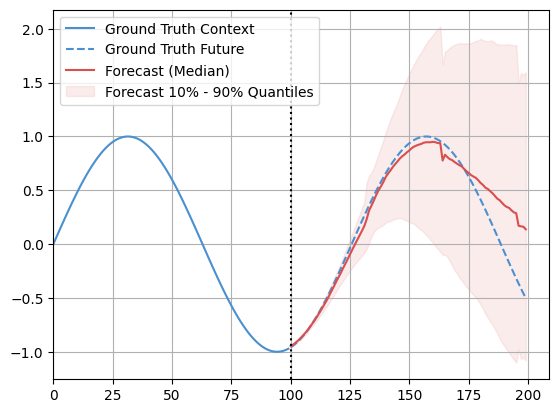

In [9]:
plot_forecast(
    context=sin_context,
    # we need to remove (squeeze) the batch dimension from the returned tensors
    forecasts=forecast_quantiles.squeeze(),
    ground_truth=sin_future
)